# Data assembly

In [84]:
#data
import pandas as pd
from IPython.display import display
from IPython.display import Image

data1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Mike', 'Mark', 'Mindy', 'Sam', 'Sue'], 
        'last_name': ['Anderson', 'Ack', 'Alion', 'Ace', 'Atiches']}
dataframe1 = pd.DataFrame(data1, columns = ['subject_id', 'first_name', 'last_name'])


data2 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Fred', 'Felipe', 'KC', 'Stan', 'Chan'], 
        'last_name': ['Anderson', 'Ack', 'Alion', 'Ace', 'Atiches']}
dataframe2 = pd.DataFrame(data2, columns = ['subject_id', 'first_name', 'last_name'])


,subject_id,first_name,last_name
0,1,Fred,Anderson
1,2,Felipe,Ack
2,3,KC,Alion
3,4,Stan,Ace
4,5,Chan,Atiches


In [87]:
# concat dataframe 1&2
pd.concat([dataframe1,dataframe2])

,subject_id,first_name,last_name
0,1,Mike,Anderson
1,2,Mark,Ack
2,3,Mindy,Alion
3,4,Sam,Ace
4,5,Sue,Atiches
0,1,Fred,Anderson
1,2,Felipe,Ack
2,3,KC,Alion
3,4,Stan,Ace
4,5,Chan,Atiches


In [88]:
#joining two columns dataframes along columns with the axis
pd.concat([dataframe1,dataframe2], axis=1)

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Mike,Anderson,1,Fred,Anderson
1,2,Mark,Ack,2,Felipe,Ack
2,3,Mindy,Alion,3,KC,Alion
3,4,Sam,Ace,4,Stan,Ace
4,5,Sue,Atiches,5,Chan,Atiches


In [91]:
#joins
innerjoin=pd.merge(dataframe1,dataframe2, on='subject_id', how='inner') 

  subject_id first_name_x last_name_x first_name_y last_name_y
0          1         Mike    Anderson         Fred    Anderson
1          2         Mark         Ack       Felipe         Ack
2          3        Mindy       Alion           KC       Alion
3          4          Sam         Ace         Stan         Ace
4          5          Sue     Atiches         Chan     Atiches


# Dataframe basics

In [1]:
#Read Data as Dataframe
import pandas as pd
df=pd.read_csv('titanic.csv')

In [2]:
# No of rows and columns
df.shape

(891, 12)

In [4]:
#columns in the data
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
# specific columns
subset=df[['Survived','Pclass']]
subset.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [12]:
# Gives info about 6th row
df.iloc[5]

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object

In [14]:
#return any passenger whose age is 15 or greater, whose age is less than 35 and was a third class passenger. 
df1=df[(df.Age >= 15) & (df.Age <= 35) & (df.Pclass >= 3)]
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


In [16]:
#all the passengers in our dataset that were 22. 
(df[df.Age==22]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
80,81,0,3,"Waelens, Mr. Achille",male,22.0,0,0,345767,9.0000,NaN,S
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S


In [18]:
#average survival rate between the male and female.
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [25]:
# group entire data by sex,Pclass
df.groupby(['Sex','Pclass']).mean()

Age      Fare                                          Name  \
Sex    Pclass                                                                 
female 1       63.0  512.3292                      Young, Miss. Marie Grice   
       2       57.0   65.0000        Yrois, Miss. Henriette ("Mrs Harbeck")   
       3       63.0   69.5500  de Messemaeker, Mrs. Guillaume Joseph (Emma)   
male   1       80.0  512.3292                            Wright, Mr. George   
       2       70.0   73.5000                     del Carlo, Mr. Sebastiano   
       3       74.0   69.5500                   van Melkebeke, Mr. Philemon   

               Parch  PassengerId  SibSp  Survived       Ticket  
Sex    Pclass                                                    
female 1           2          888      3         1    WE/P 5735  
       2           3          881      3         1  W./C. 14258  
       3           6          889      8         1   W./C. 6609  
male   1           4          890      3         1    WE/P 5735  
       2           2          887      2         1    W/C 14208  
       3           5          891      8         1   W./C. 6608

In [26]:
# No of obs in every class and gender
df.groupby(['Sex','Pclass']).size()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
dtype: int64

# Plots with Matplotlib

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Square Graph')

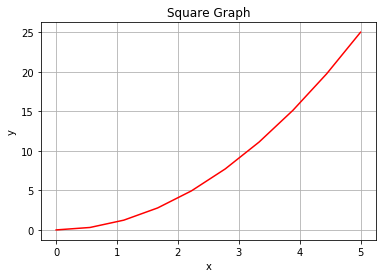

In [30]:
x=np.linspace(0,5,10)
y=x**2
fig, ax = plt.subplots()
ax.plot(x, y, color='red')
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Square Graph')

# Plots with Seaborn

In [36]:
import seaborn as sns
%matplotlib inline

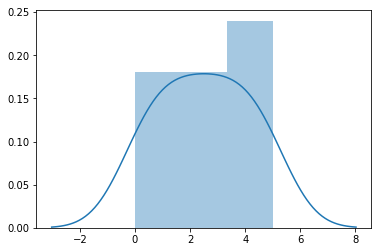

In [37]:
sns.distplot(x)

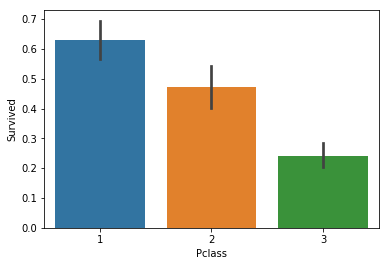

In [40]:
#barplot
sns.barplot(x='Pclass',y='Survived',data=df)

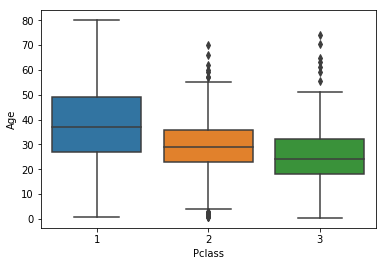

In [45]:
#boxplot
sns.boxplot(y=df.Age,x=df.Pclass)

# Missing values

In [47]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
# data 
raw_data = {'first_name': ['Mike', np.nan, 'Tina', 'James', 'Eddie'], 
        'last_name': ['West', np.nan, 'Turner', 'Bond', 'Vetter'], 
        'age': [42, np.nan, 36, 24, 73], 
        'sex': ['m', np.nan, 'f', 'm', 'f'], 
        'preTestScore': [4, np.nan, np.nan, 2, 3],
        'postTestScore': [25, np.nan, np.nan, 62, 70]}
df2 = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df2

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Mike,West,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Turner,36.0,f,NaN,NaN
3,James,Bond,24.0,m,2.0,62.0
4,Eddie,Vetter,73.0,f,3.0,70.0


In [54]:
# Drop row/col where all values are na
df2.dropna(how='all')

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Mike,West,42.0,m,4.0,25.0
2,Tina,Turner,36.0,f,NaN,NaN
3,James,Bond,24.0,m,2.0,62.0
4,Eddie,Vetter,73.0,f,3.0,70.0


In [55]:
#removes any column where the values are Nans.
df2.dropna(how='all',axis=1)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Mike,West,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Turner,36.0,f,NaN,NaN
3,James,Bond,24.0,m,2.0,62.0
4,Eddie,Vetter,73.0,f,3.0,70.0


In [56]:
# drop all rows that have less than 5 observations. 
df2.dropna(thresh=5)

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Mike,West,42.0,m,4.0,25.0
3,James,Bond,24.0,m,2.0,62.0
4,Eddie,Vetter,73.0,f,3.0,70.0


In [57]:
#fills the column preTestScore with mean values. 
df2["preTestScore"].fillna(df2["preTestScore"].mean(), inplace=True)
df2

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Mike,West,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,3.0,NaN
2,Tina,Turner,36.0,f,3.0,NaN
3,James,Bond,24.0,m,2.0,62.0
4,Eddie,Vetter,73.0,f,3.0,70.0


# Duplicate data

In [58]:
# data
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
url = 'http://bit.ly/movieusers'
users = pd.read_table(url, sep='|', header=None, names=user_cols, index_col='user_id')

In [59]:
users.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [62]:
# check duplicate zipcodes
users.zip_code.duplicated().sum()

148

In [65]:
#  marking the duplicates to true except for the first occurrence. 
users.loc[users.duplicated(keep='first'), :]

,age,gender,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


# Breaking strings

In [ ]:
# Assigning One to 1, Two to 2 and Three to 3
One, Two, Three = [1, 2, 3]

In [66]:
#Assigning firstLetter to 'M', secondLetter to 'i'... etc. 
firstLetter, secondLetter, thirdLetter, fourthLetter = 'Mike'
print(firstLetter)

M
